In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring display options
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


#### Load the Dataset

In [16]:
spotify = pd.read_csv("data/data.csv")  
spotify.info()
spotify.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [17]:
# Get the basic summaries on the dataset
spotify.describe(include='all').transpose().head(15)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
valence,170653.0,NaN,NaN,NaN,0.528587,0.263171,0.0,0.317,0.54,0.747,1.0
year,170653.0,NaN,NaN,NaN,1976.787241,25.917853,1921.0,1956.0,1977.0,1999.0,2020.0
acousticness,170653.0,NaN,NaN,NaN,0.502115,0.376032,0.0,0.102,0.516,0.893,0.996
artists,170653,34088,['Эрнест Хемингуэй'],1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,170653.0,NaN,NaN,NaN,0.537396,0.176138,0.0,0.415,0.548,0.668,0.988
duration_ms,170653.0,NaN,NaN,NaN,230948.310666,126118.414668,5108.0,169827.0,207467.0,262400.0,5403500.0
energy,170653.0,NaN,NaN,NaN,0.482389,0.267646,0.0,0.255,0.471,0.703,1.0
explicit,170653.0,NaN,NaN,NaN,0.084575,0.278249,0.0,0.0,0.0,0.0,1.0
id,170653,170653,4BJqT0PrAfrxzMOxytFOIz,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,170653.0,NaN,NaN,NaN,0.16701,0.313475,0.0,0.0,0.000216,0.102,1.0


In [18]:
#Check for missing values
spotify.isnull().sum().sort_values(ascending=False).head(10)

# Check unique counts to detect placeholders or errors
spotify['year'].value_counts().sort_index().head(20)


year
1921     150
1922      71
1923     185
1924     236
1925     278
1926    1378
1927     615
1928    1261
1929     952
1930    1924
1931     966
1932     502
1933     691
1934     578
1935    1518
1936    1100
1937     657
1938     613
1939    1000
1940    2000
Name: count, dtype: int64

In [19]:
# Check for duplicate track IDs
duplicates = spotify.duplicated(subset=['id']).sum()
print(f"Duplicate IDs: {duplicates}")


Duplicate IDs: 0


### Feature Distribution Exploration
We visualize the distributions of key acoustic features (danceability, energy, valence, etc.) to understand their ranges, skewness, and outlier behavior. This guides decisions for normalization and filtering.


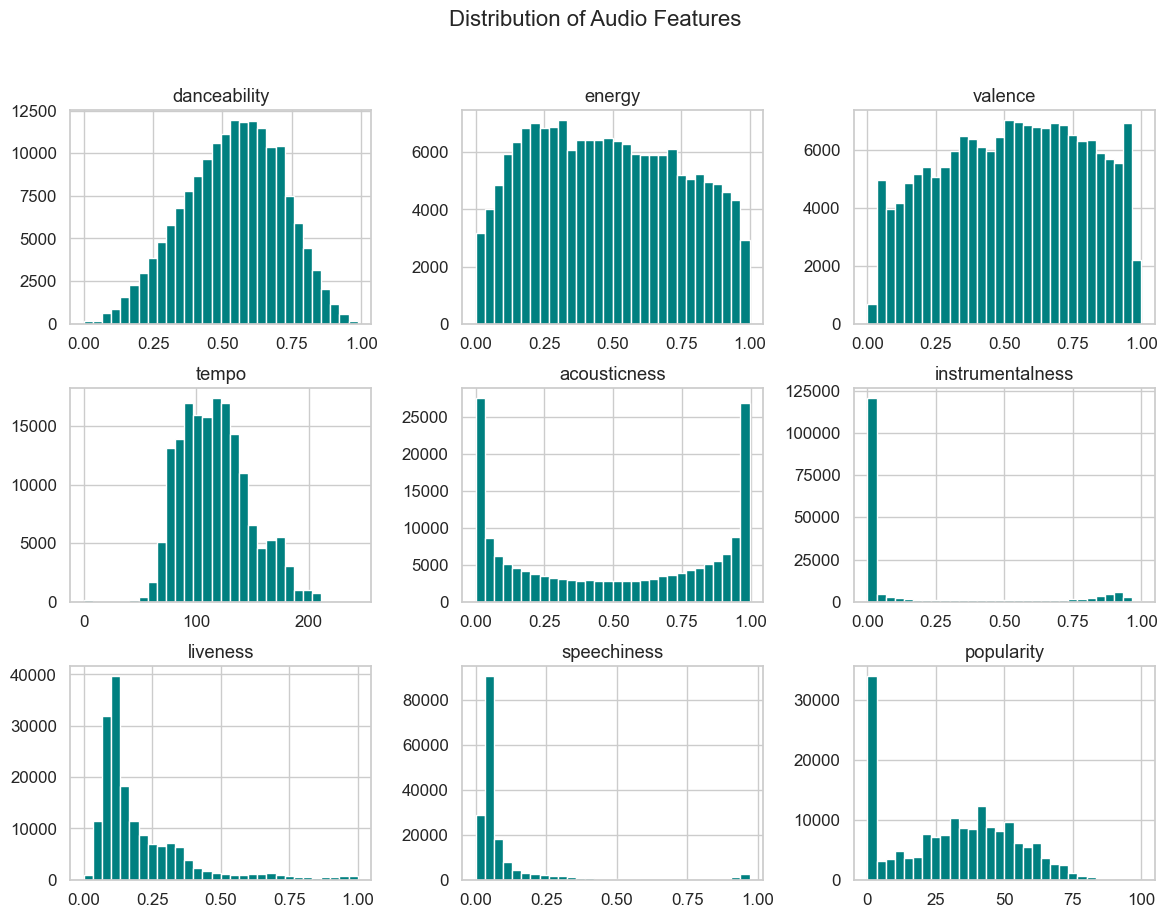

In [20]:
num_cols = ['danceability', 'energy', 'valence', 'tempo', 'acousticness', 
            'instrumentalness', 'liveness', 'speechiness', 'popularity']

spotify[num_cols].hist(bins=30, figsize=(14,10), color='teal')
plt.suptitle("Distribution of Audio Features", fontsize=16)
plt.show()


### Correlation Between Audio Features
A correlation heatmap helps us identify redundancy or strong relationships among features. Highly correlated attributes may carry overlapping information, which is useful to keep in mind for embedding and distance-based similarity.


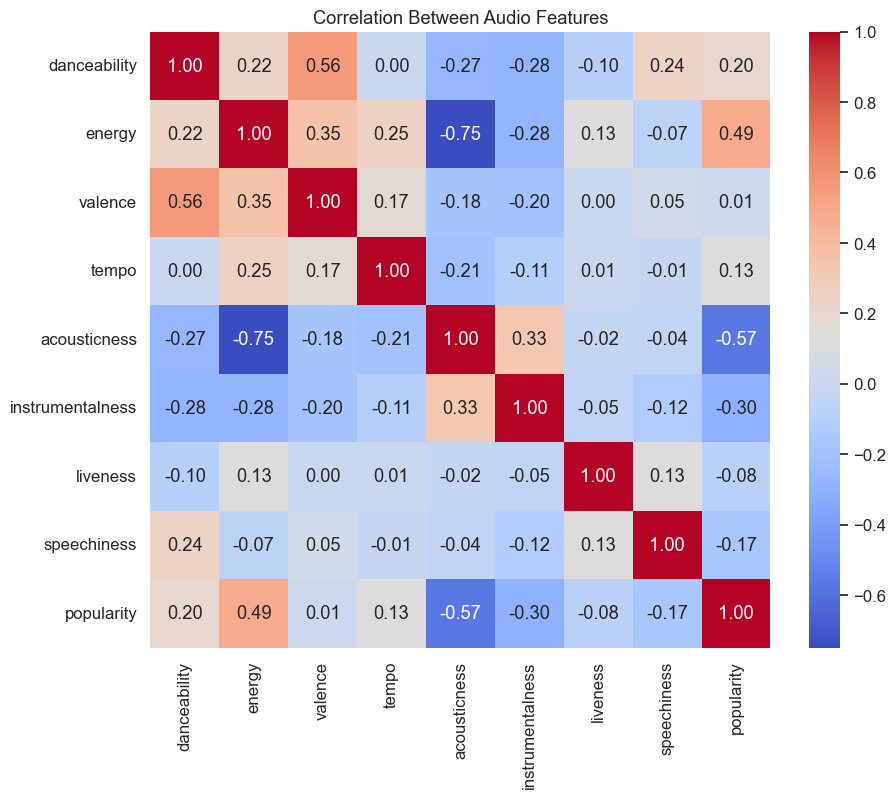

In [21]:
corr = spotify[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Between Audio Features")
plt.show()

### Metadata Exploration
We inspect basic metadata such as the number of unique artists and the distribution of track release years, and also visualize popularity trends over time. These insights help shape realistic query workloads for hybrid search.


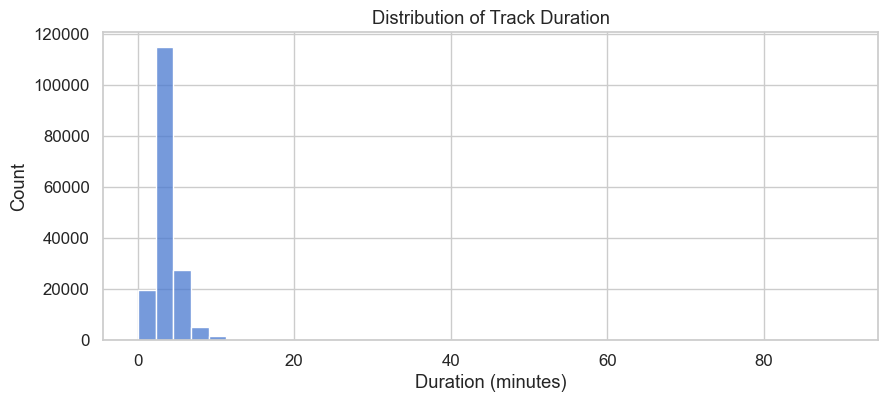

In [22]:
plt.figure(figsize=(10,4))
sns.histplot(spotify['duration_ms']/60000, bins=40)
plt.xlabel("Duration (minutes)")
plt.title("Distribution of Track Duration")
plt.show()


Unique artists: 34088
Years range: 1921 - 2020


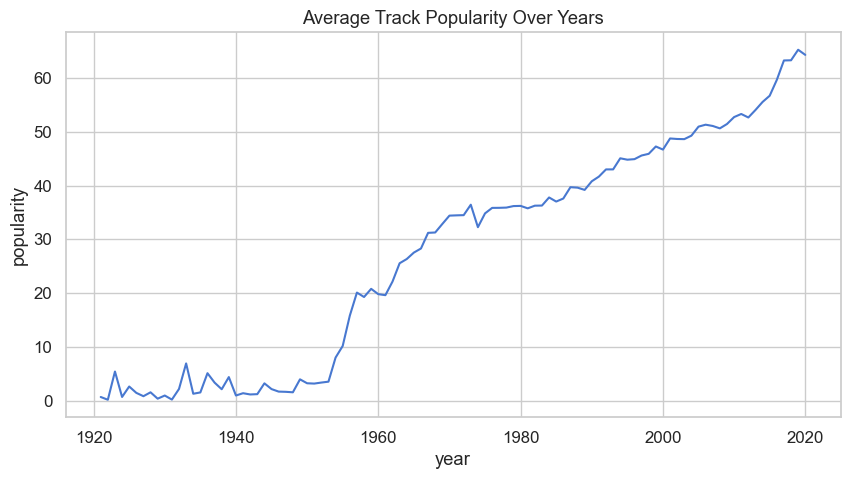

In [23]:
# Number of unique artists and years
print(f"Unique artists: {spotify['artists'].nunique()}")
print(f"Years range: {spotify['year'].min()} - {spotify['year'].max()}")

# Popularity trend by year
yearly_pop = spotify.groupby('year')['popularity'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_pop, x='year', y='popularity')
plt.title("Average Track Popularity Over Years")
plt.show()


### Outlier Detection for Numeric Features
We use boxplots to inspect tempo, duration, and popularity for extreme values. Outliers can distort distance-based similarity, so detecting them is essential before normalization.


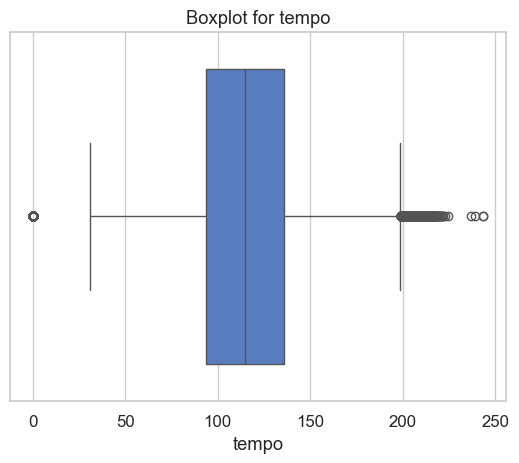

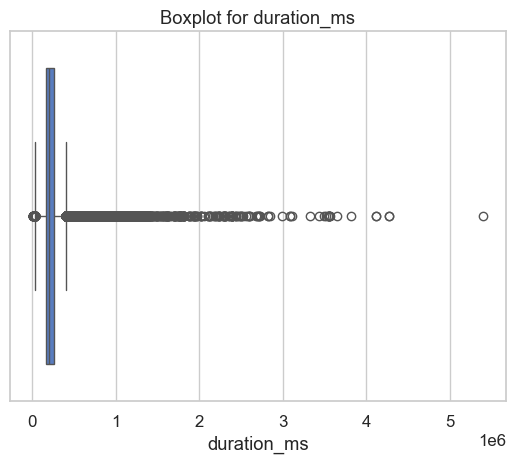

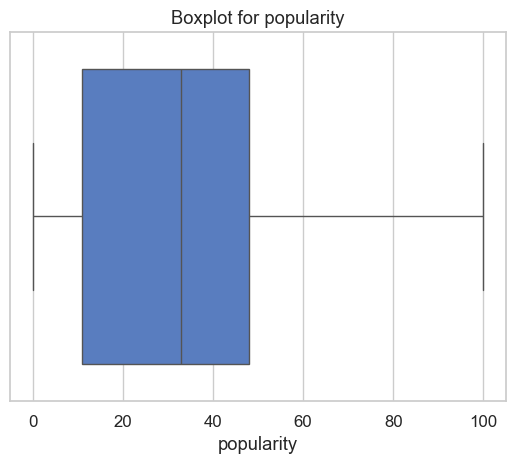

In [24]:
for col in ['tempo', 'duration_ms', 'popularity']:
    plt.figure()
    sns.boxplot(x=spotify[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


### Filtering Extreme Tempo and Duration Values
Based on the EDA, we remove unrealistic tempo values and extremely long tracks that fall far outside normal listening behavior. This ensures that normalization and similarity computations remain meaningful.


In [25]:
# tempo and duration filters
spotify_filtered = spotify[
    spotify['tempo'].between(40, 220) &
    (spotify['duration_ms'] < 900_000)  # capping duration at 15 minutes
]

print(f"Filtered dataset size: {spotify_filtered.shape[0]} rows (out of {spotify.shape[0]})")
print(f"Removed {(spotify.shape[0] - spotify_filtered.shape[0])} rows with extreme tempo/duration.")


Filtered dataset size: 169776 rows (out of 170653)
Removed 877 rows with extreme tempo/duration.


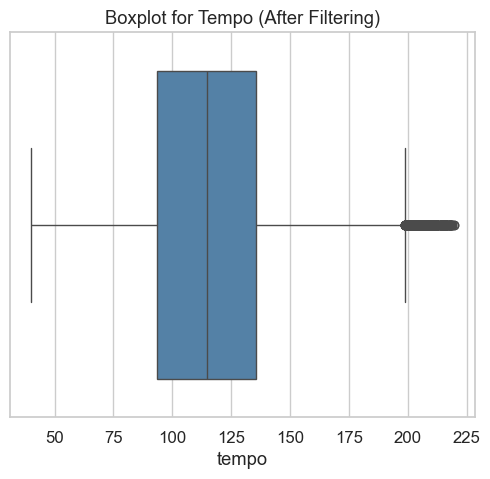

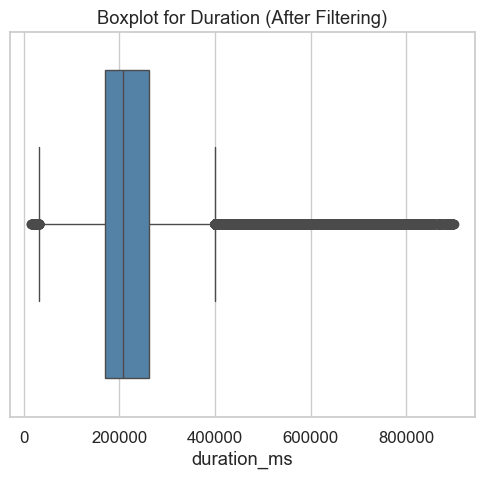

In [26]:
# Validating changes through the box plots 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.boxplot(x=spotify_filtered['tempo'], color='steelblue')
plt.title("Boxplot for Tempo (After Filtering)")
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(x=spotify_filtered['duration_ms'], color='steelblue')
plt.title("Boxplot for Duration (After Filtering)")
plt.show()


### Normalizing Numeric Features and Encoding Categoricals
We apply MinMax scaling to the acoustic features and encode categorical fields (key, mode, explicit). This produces a clean numerical feature matrix suitable for embedding generation.


In [28]:
from sklearn.preprocessing import MinMaxScaler

spotify_filtered = spotify_filtered.copy()

# List of numeric columns to normalize
num_cols = [
    'danceability', 'energy', 'valence', 'tempo', 'acousticness',
    'instrumentalness', 'liveness', 'speechiness', 'loudness', 'popularity'
]

# Initialize and apply MinMax scaling
scaler = MinMaxScaler()
spotify_filtered[num_cols] = scaler.fit_transform(spotify_filtered[num_cols])

# Encode categorical features
spotify_filtered['key'] = spotify_filtered['key'].astype('category').cat.codes
spotify_filtered['mode'] = spotify_filtered['mode'].astype('category').cat.codes
spotify_filtered['explicit'] = spotify_filtered['explicit'].astype(int)

print("Normalization and encoding complete.")

Normalization and encoding complete.


In [31]:
# Validation the normalization step

import numpy as np
import pandas as pd

# 1. Confirm numeric column ranges (should all be within [0, 1])
print("Feature Ranges (Min-Max after Normalization):\n")
for col in num_cols:
    min_val, max_val = spotify_filtered[col].min(), spotify_filtered[col].max()
    print(f"{col:<18} - min: {min_val:.3f}, max: {max_val:.3f}")

# 2. Check for any NaN or infinite values
print("\nMissing or Infinite Values:\n")
missing = spotify_filtered.isna().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No NaN values detected.")

infs = np.isinf(spotify_filtered[num_cols]).any().sum()
print(f"Infinite values found: {infs}")

# 3. Verify categorical encodings look correct
print("\nEncoded Categorical Checks:")
print(f"key - unique values: {spotify_filtered['key'].nunique()} (expected <= 12)")
print(f"mode - unique values: {spotify_filtered['mode'].unique()}")
print(f"explicit - value counts:\n{spotify_filtered['explicit'].value_counts()}")

# 4. Confirm data types
print("\nData Types Overview:")
print(spotify_filtered.dtypes)

# 5. Confirm final shape
print(f"\nFinal dataset shape: {spotify_filtered.shape}")


Feature Ranges (Min-Max after Normalization):

danceability       - min: 0.000, max: 1.000
energy             - min: 0.000, max: 1.000
valence            - min: 0.000, max: 1.000
tempo              - min: 0.000, max: 1.000
acousticness       - min: 0.000, max: 1.000
instrumentalness   - min: 0.000, max: 1.000
liveness           - min: 0.000, max: 1.000
speechiness        - min: 0.000, max: 1.000
loudness           - min: 0.000, max: 1.000
popularity         - min: 0.000, max: 1.000

Missing or Infinite Values:

No NaN values detected.
Infinite values found: 0

Encoded Categorical Checks:
key - unique values: 12 (expected <= 12)
mode - unique values: [1 0]
explicit - value counts:
explicit
0    155359
1     14417
Name: count, dtype: int64

Data Types Overview:
valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id    

In [32]:
# Saving the cleaned dataset
spotify_filtered.to_parquet("data/spotify_clean.parquet", index=False)
print("Saved cleaned dataset to data/spotify_clean.parquet")


Saved cleaned dataset to data/spotify_clean.parquet
